# Gai/Lib: Examples

## Text-to-Text (TTT)

### Setup

Build the docker image using the following command in terminal.

```bash
docker buildx build \
    --build-arg CATEGORY=ttt2 \
    -f ../../gai-sdk/gai-gen/Dockerfile.torch2.2-cuda12.1-cudnn8 \
    -t gai-ttt:latest ../../gai-sdk/gai-gen/
```

### Example: mistral7b-exllamav2 (**GPU Required**)

Download model

```bash
huggingface-cli download bartowski/Mistral-7B-Instruct-v0.3-exl2 \
    --revision 1a09a351a5fb5a356102bfca2d26507cdab11111 \
    --local-dir ~/gai/models/Mistral-7B-Instruct-v0.3-exl2 \
    --local-dir-use-symlinks False

```

1. Start service

In [18]:
%%bash
docker container rm -f gai-ttt
docker run -d \
    -e DEFAULT_GENERATOR=mistral7b-exllama2 \
    --gpus all \
    -v ~/gai/models:/app/models \
    -p 12031:12031 \
    --name gai-ttt \
    gai-ttt:latest

Error response from daemon: No such container: gai-ttt


74573672cc8158b3963bdd56ead72db5bc817d299e8a2df4ecf74cf41a31d695


2. Chat

In [1]:
# Chat Completion Request
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")
for chunk in ggg(
    category="ttt", 
    type="gai", 
    messages="user: Tell me a one paragraph story\nassistant:"
    ):
    print(chunk.decode(),end="",flush=True)
print("\n")

DEBUG    TTTClient.api: messages=user: Tell me a one paragraph story
assistant:
DEBUG    httppost:url=http://localhost:12031/gen/v1/chat/completions
DEBUG    httppost:data={'messages': [{'content': 'Tell me a one paragraph story', 'role': 'user'},
              {'content': '', 'role': 'assistant'}],
 'stream': True}


Once upon a time, in a small village nestled between the mountains, lived a young girl named Mia. She was known for her radiant smile and her love for singing. One day, while walking home from school, she found a wounded bird near the path. Mia gently picked up the bird, cared for it, and eventually helped it fly again. This act of kindness not only saved the bird's life but also inspired the entire village, earning Mia their respect and admiration.
({'finish_reason': 'stop'}, 'finish_reason')



3. Function Call

In [2]:
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")

response = ggg(category="ttt",
    type="gai",
    messages="user: What is today's date?\nassistant:",
    tools=[
        {
            "type": "function",
            "function": {
                "name": "gg",
                "description": "The 'gg' function is a powerful tool that allows the AI to gather external information from the internet using Google search. It can be invoked when the AI needs to answer a question or provide information that requires up-to-date, comprehensive, and diverse sources which are not inherently known by the AI. For instance, it can be used to find current news, weather updates, latest sports scores, trending topics, specific facts, or even the current date and time. The usage of this tool should be considered when the user's query implies or explicitly requests recent or wide-ranging data, or when the AI's inherent knowledge base may not have the required or most current information. The 'search_query' parameter should be a concise and accurate representation of the information needed.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "search_query": {
                            "type": "string",
                            "description": "The search query to search google with. For example, to find the current date or time, use 'current date' or 'current time' respectively."
                        }
                    },
                    "required": ["search_query"]
                }
            }
        }                   
    ],
    stream=False)
print(response.decode())

DEBUG    TTTClient.api: messages=user: What is today's date?
assistant:
DEBUG    httppost:url=http://localhost:12031/gen/v1/chat/completions
DEBUG    httppost:data={'messages': [{'content': "What is today's date?", 'role': 'user'},
              {'content': '', 'role': 'assistant'}],
 'stream': False,
 'tools': [{'function': {'description': "The 'gg' function is a powerful tool "
                                        'that allows the AI to gather external '
                                        'information from the internet using '
                                        'Google search. It can be invoked when '
                                        'the AI needs to answer a question or '
                                        'provide information that requires '
                                        'up-to-date, comprehensive, and '
                                        'diverse sources which are not '
                                        'inherently known by the AI. For

{'type': 'function', 'name': 'gg', 'arguments': '{"search_query": "current date"}'}


4. JSON Mode

In [3]:
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")

# Define Grammar
from dataclasses import dataclass
@dataclass
class Book:
    title: str
    summary: str
    author: str
    published_year: int
from pydantic import TypeAdapter
type_adaptor=TypeAdapter(Book)
schema=type_adaptor.json_schema()

# Convert unstructured to book record
text = """Foundation is a science fiction novel by American writer
Isaac Asimov. It is the first published in his Foundation Trilogy (later
expanded into the Foundation series). Foundation is a cycle of five
interrelated short stories, first published as a single book by Gnome Press
in 1951. Collectively they tell the early story of the Foundation,
an institute founded by psychohistorian Hari Seldon to preserve the best
of galactic civilization after the collapse of the Galactic Empire.
"""

response = ggg(category="ttt",
    type="gai",
    messages=f"user: transform this to JSON \n{text}\nassistant:",
    schema=schema,
    stream=False)
print(response.decode())

DEBUG    TTTClient.api: messages=user: transform this to JSON 
Foundation is a science fiction novel by American writer
Isaac Asimov. It is the first published in his Foundation Trilogy (later
expanded into the Foundation series). Foundation is a cycle of five
interrelated short stories, first published as a single book by Gnome Press
in 1951. Collectively they tell the early story of the Foundation,
an institute founded by psychohistorian Hari Seldon to preserve the best
of galactic civilization after the collapse of the Galactic Empire.

assistant:
DEBUG    httppost:url=http://localhost:12031/gen/v1/chat/completions
DEBUG    httppost:data={'messages': [{'content': 'transform this to JSON Foundation is a science '
                          'fiction novel by American writer Isaac Asimov. It '
                          'is the first published in his Foundation Trilogy '
                          '(later expanded into the Foundation series). '
                          'Foundation is a c

{'type': 'content', 'content': '{"title": "Foundation", "summary": "Science fiction novel by Isaac Asimov, first published in 1951. It is the first book in the Foundation Trilogy (later expanded into the Foundation series). The book consists of five interrelated short stories that tell the early story of the Foundation, an institute founded by psychohistorian Hari Seldon to preserve the best of galactic civilization after the collapse of the Galactic Empire.", "author": "Isaac Asimov", "published_year": 1951}'}


### Example: llama3-llamacpp (**CPU Only**)

Download model

```sh
huggingface-cli download bartowski/LLaMA3-iterative-DPO-final-GGUF \
                LLaMA3-iterative-DPO-final-Q4_K_M.gguf  \
                --local-dir ~/gai/models/LLaMA3-iterative-DPO-final-GGUF \
                --local-dir-use-symlinks False
```

Start service

In [1]:
%%bash
docker container rm -f gai-ttt
docker run -d \
    -e DEFAULT_GENERATOR=llama3-llamacpp \
    --gpus all \
    -v ~/gai/models:/app/models \
    -p 12031:12031 \
    --name gai-ttt \
    gai-ttt:latest

Error response from daemon: No such container: gai-ttt


05b22a778df535fef61923bdeeb1383ee7813b3ac5a57b840636d7a1f5ccda16


2. Chat

In [7]:
# Chat Completion Request
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")
for chunk in ggg(
    category="ttt", 
    type="gai", 
    messages="user: Tell me a one paragraph story\nassistant:"):
    print(chunk.decode(),end="",flush=True)
print("\n")

DEBUG    TTTClient.api: messages=user: Tell me a one paragraph story
assistant:
DEBUG    httppost:url=http://localhost:12031/gen/v1/chat/completions
DEBUG    httppost:data={'messages': [{'content': 'Tell me a one paragraph story', 'role': 'user'},
              {'content': '', 'role': 'assistant'}],
 'stream': True}


Once upon a time, in the heart of an enchanted forest, there lived a young girl named Elara. She was known for her kind heart and adventurous spirit. One day, while exploring the depths of the woods, she stumbled upon a mysterious old tree with a hollow trunk. Curious, she peered inside and discovered a tiny door leading to a hidden world within. As she stepped through, she found herself in a magical realm filled with talking animals, singing flowers, and twinkling stars that({'finish_reason': 'length'}, 'finish_reason')



3. Function Call

In [2]:
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")

response = ggg(category="ttt",
    type="gai",
    messages="user: What is today's date?\nassistant:",
    tools=[
        {
            "type": "function",
            "function": {
                "name": "gg",
                "description": "The 'gg' function is a powerful tool that allows the AI to gather external information from the internet using Google search. It can be invoked when the AI needs to answer a question or provide information that requires up-to-date, comprehensive, and diverse sources which are not inherently known by the AI. For instance, it can be used to find current news, weather updates, latest sports scores, trending topics, specific facts, or even the current date and time. The usage of this tool should be considered when the user's query implies or explicitly requests recent or wide-ranging data, or when the AI's inherent knowledge base may not have the required or most current information. The 'search_query' parameter should be a concise and accurate representation of the information needed.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "search_query": {
                            "type": "string",
                            "description": "The search query to search google with. For example, to find the current date or time, use 'current date' or 'current time' respectively."
                        }
                    },
                    "required": ["search_query"]
                }
            }
        }                   
    ],
    stream=False)
print(response.decode())

DEBUG    TTTClient.api: messages=user: What is today's date?
assistant:
DEBUG    httppost:url=http://localhost:12031/gen/v1/chat/completions
DEBUG    httppost:data={'messages': [{'content': "What is today's date?", 'role': 'user'},
              {'content': '', 'role': 'assistant'}],
 'stream': False,
 'tools': [{'function': {'description': "The 'gg' function is a powerful tool "
                                        'that allows the AI to gather external '
                                        'information from the internet using '
                                        'Google search. It can be invoked when '
                                        'the AI needs to answer a question or '
                                        'provide information that requires '
                                        'up-to-date, comprehensive, and '
                                        'diverse sources which are not '
                                        'inherently known by the AI. For

{'type': 'content', 'content': '{\n  "type": "function",\n  "function": {\n    "name": "gg",\n    "description": "The \'gg\' function is a powerful tool that allows the AI to gather external information from the internet using Google search.",\n    "parameters": {\n      "type": "object",\n      "properties": {\n        "search_query": {\n          "type": "string",\n          "description": "The search query to search google with. For example, to find the current date'}


4. JSON Mode

In [9]:
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")

# Define Grammar
from dataclasses import dataclass
@dataclass
class Book:
    title: str
    summary: str
    author: str
    published_year: int
from pydantic import TypeAdapter
type_adaptor=TypeAdapter(Book)
schema=type_adaptor.json_schema()

# Convert unstructured to book record
text = """Foundation is a science fiction novel by American writer
Isaac Asimov. It is the first published in his Foundation Trilogy (later
expanded into the Foundation series). Foundation is a cycle of five
interrelated short stories, first published as a single book by Gnome Press
in 1951. Collectively they tell the early story of the Foundation,
an institute founded by psychohistorian Hari Seldon to preserve the best
of galactic civilization after the collapse of the Galactic Empire.
"""

response = ggg(category="ttt",
    type="gai",
    messages=f"user: transform this to JSON \n{text}\nassistant:",
    schema=schema,
    stream=False)
print(response.decode())

DEBUG    TTTClient.api: messages=user: transform this to JSON 
Foundation is a science fiction novel by American writer
Isaac Asimov. It is the first published in his Foundation Trilogy (later
expanded into the Foundation series). Foundation is a cycle of five
interrelated short stories, first published as a single book by Gnome Press
in 1951. Collectively they tell the early story of the Foundation,
an institute founded by psychohistorian Hari Seldon to preserve the best
of galactic civilization after the collapse of the Galactic Empire.

assistant:
DEBUG    httppost:url=http://localhost:12031/gen/v1/chat/completions
DEBUG    httppost:data={'messages': [{'content': 'transform this to JSON Foundation is a science '
                          'fiction novel by American writer Isaac Asimov. It '
                          'is the first published in his Foundation Trilogy '
                          '(later expanded into the Foundation series). '
                          'Foundation is a c

{'type': 'content', 'content': '{"title": "Foundation", "summary": "A science fiction novel by American writer Isaac Asimov. It is the first published in his Foundation Trilogy (later expanded into the Foundation series).", "author": "Isaac Asimov", "published_year": 1951 } '}


### Example: gpt4-openai (**API Key Required**)

1. Chat

In [3]:
from dotenv import load_dotenv
load_dotenv()
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")

# GPT4
print("> OpenAI")
for chunk in ggg(
    category="ttt",
    type="openai",
    messages="user: Tell me a one paragraph story\nassistant:"):
    print(chunk.decode(),end="",flush=True)
print("\n")

> OpenAI
In the quaint, sleepy town of Baywood, nestled within a lush canopy of ancient emerald trees, lived an eccentric, elderly woman named Martha. Martha owned a beautiful, mystical garden where every flower bloomed twice as large and twice as fragrant as normal, where chirping birds created an enchanting symphony, and curious fairies played hide-and-seek among the indigo morning glories and fuchsia peonies. The secret to this remarkable garden, unknown to many, was Martha's companion, a tiny golden dragon that could speak in whispers and flutters, using its flaming breath to lovingly nurture these magical plants, making them flourish like nowhere else. Their peaceful world was a perfect sanctuary, where the language of chirping birds, rustling leaves, and a humming dragon filled the air, and every sunset painted the sky in a softer hue, creating an impression of a beautiful dream in reality. One fine day, a greedy businessman learned of the dragon's existence and sought to capture

2. Function call

In [4]:
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")

# OpenAI
response = ggg(category="ttt",
    type="openai",
    messages="user: Who is the current president of Singapore?\nassistant:",
    tools=[
        {
            "type": "function",
            "function": {
                "name": "gg",
                "description": "The 'gg' function is a powerful tool that allows the AI to gather external information from the internet using Google search. It can be invoked when the AI needs to answer a question or provide information that requires up-to-date, comprehensive, and diverse sources which are not inherently known by the AI. For instance, it can be used to find current news, weather updates, latest sports scores, trending topics, specific facts, or even the current date and time. The usage of this tool should be considered when the user's query implies or explicitly requests recent or wide-ranging data, or when the AI's inherent knowledge base may not have the required or most current information. The 'search_query' parameter should be a concise and accurate representation of the information needed.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "search_query": {
                            "type": "string",
                            "description": "The search query to search google with. For example, to find the current date or time, use 'current date' or 'current time' respectively."
                        }
                    },
                    "required": ["search_query"]
                }
            }
        }                   
    ],
    stream=False)
print(response.decode())

{'type': 'function', 'name': 'gg', 'arguments': '{\n  "search_query": "current president of Singapore"\n}'}


-----

## Text-to-Speech (TTS)

### Setup

Build the docker image using the following command in terminal.

```bash
docker buildx build \
    --build-arg CATEGORY=tts \
    -f ../../gai-sdk/gai-gen/Dockerfile \
    -t gai-tts:latest ../../gai-sdk/gai-gen/
```

Download model

The following demo is uses Coqui AI's xTTS model. Create and run the following script `xtts_download.py` to download the model:

```python
# xtts_download.py
import os
os.environ["COQUI_TOS_AGREED"]="1"

from TTS.utils.manage import ModelManager
print("Downloading...")
mm =  ModelManager(output_prefix="~/gai/models/tts")
model_name="tts_models/multilingual/multi-dataset/xtts_v2"
mm.download_model(model_name)
print("Downloaded")
```

Take note that loading the model for the first time will take a while for deepspeed to compile the model.

Start service

Convert the input text "The definition of insanity is doing the same thing over and over and expecting different results." to speech using the examples below.

In [5]:
%%bash
docker container rm -f gai-ttt gai-tts
docker run -d \
    -e DEFAULT_GENERATOR=xtts-2 \
    --gpus all \
    -v ~/gai/models:/app/models \
    -p 12032:12032 \
    --name gai-tts \
    gai-tts:latest

gai-ttt


Error response from daemon: No such container: gai-tts


74d78c83b63fac645c946c7e9ca81f68c6f9b7f43c2d01174a3d14ea0c2e4461


### Example: Coqui xTTS

In [8]:
# coqui xtts
from gai.common.sound_utils import play_audio,save_audio
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")

response = ggg(category="tts", 
    type="gai",
    input="The definition of insanity is doing the same thing over and over and expecting different results.",
    voice=None,
    language=None
    )
play_audio(response)

DEBUG    httppost:url=http://localhost:12032/gen/v1/audio/speech
DEBUG    httppost:data={'input': 'The definition of insanity is doing the same thing over and over '
          'and expecting different results.',
 'language': None,
 'stream': True,
 'voice': None}


Example: Generate speech with OpenAI

In [9]:
# openai tts
from gai.common.sound_utils import play_audio
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")
response = ggg("tts", 
    type="openai", 
    input="The definition of insanity is doing the same thing over and over and expecting different results.",
    voice=None,
    language=None
    )
play_audio(response)

---

## Speech-to-Text (STT)

### Setup

Build the docker image using the following command in terminal.

```bash
docker buildx build \
    --build-arg CATEGORY=stt \
    -f ../../gai-sdk/gai-gen/Dockerfile \
    -t gai-stt:latest ../../gai-sdk/gai-gen/
```

Download model

```bash
mkdir ~/gai/models
huggingface-cli download openai/whisper-large-v3 \
        --local-dir ~/gai/models/whisper-large-v3 \
        --local-dir-use-symlinks False
```

Start service

In [16]:
%%bash
docker container rm -f gai-ttt gai-tts gai-stt
docker run -d \
    -e DEFAULT_GENERATOR=whisper-transformers \
    --gpus all \
    -v ~/gai/models:/app/models \
    -p 12033:12033 \
    --name gai-stt \
    gai-stt:latest

Error response from daemon: No such container: gai-ttt
Error response from daemon: No such container: gai-tts
Error response from daemon: No such container: gai-stt


78940b6ff8b268dddde6f3e97c1721a17b0ad4e97369a4c693e7ab22b3da904e


Original Audio

In [20]:
# sample
with open("./data/today-is-a-wonderful-day.wav", "rb") as f:
    play_audio(f.read())

Example: Transcribe audio with local Whisper

In [22]:
# OpenSource Whisper
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")
with open("./data/today-is-a-wonderful-day.wav", "rb") as f:
    output = ggg(category="stt", 
        type="gai",
        file=f)
    print(output.decode())

DEBUG    httppost:url=http://localhost:12033/gen/v1/audio/transcriptions
DEBUG    httppost:data=None


 Today is a wonderful day to build something people love.


Example: Transcribe audio with OpenAI Whisper

In [23]:
# OpenAI Whisper
from gai.lib.GGG import GGG
ggg=GGG("../gai-lib/gai.yml")
with open("./data/today-is-a-wonderful-day.wav", "rb") as f:
    output = ggg(category="stt", 
        type="openai",
        file=f)
    print(output.text)

Today is a wonderful day to build something people love.


---

## Image-to-Text (ITT)

### Setup

Build the docker image using the following command in terminal.

```bash
docker buildx build \
    --build-arg CATEGORY=itt \
    -f ../../gai-sdk/gai-gen/Dockerfile.ITT \
    -t gai-itt:latest ../../gai-sdk/gai-gen/
```

Download model

```bash
mkdir ~/gai/models
huggingface-cli download liuhaotian/llava-v1.5-7b \
        --local-dir ~/gai/models/llava-v1.5-7b \
        --local-dir-use-symlinks False
```

Start service

In [24]:
%%bash
docker container rm -f gai-ttt gai-tts gai-stt gai-itt
docker run -d \
    -e DEFAULT_GENERATOR=llava-transformers \
    --gpus all \
    -v ~/gai/models:/app/models \
    -p 12034:12034 \
    --name gai-itt \
    gai-itt:latest

Error response from daemon: No such container: gai-ttt
Error response from daemon: No such container: gai-tts
Error response from daemon: No such container: gai-stt
Error response from daemon: No such container: gai-itt


a5f744887ef1f625e261f743bb29bd0d4e366c2c78cc419864acff7a09e64139


Here is the image

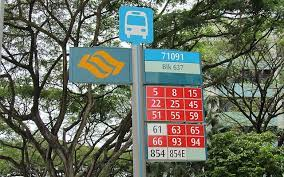

In [26]:
from gai.common.image_utils import read_to_base64
import os
from IPython.display import Image,display
encoded_string = read_to_base64("./data/buses.jpeg")
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "What’s in this image?"},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{encoded_string}",
                },
            },
        ],
    }
]
display(Image("./data/buses.jpeg"))

Example: Describe with Llava

DEBUG    httppost:url=http://localhost:12034/gen/v1/vision/completions
DEBUG    httppost:data={'messages': [{'content': [{'text': 'What’s in this image?', 'type': 'text'},
                           {'image_url': {'url': ''},
                            'type': 'image_url'}],
               'role': 'user'}],
 'stream': True}

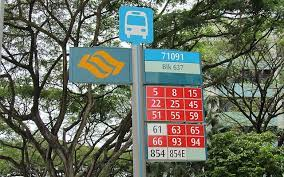

The image features a bus stop with a bus schedule sign and a bus map. The bus stop is located near a tree, and the sign is placed on a pole. The sign displays the bus route, including the bus number and the route number. The bus stop is situated on the side of the road, providing information for passengers about the bus schedule and route.({'finish_reason': 'stop'}, 'finish_reason')

In [27]:
# Llava
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")

for chunk in ggg(category="itt",
    type="gai",
    messages=messages,
    stream=True
    ):
    print(chunk.decode(),end="",flush=True)

Example: Describe with OpenAI Vision

In [4]:
# OpenAI
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")
for chunk in ggg(
    category="itt", 
    type="openai",
    messages=messages, 
    stream=True, 
    max_tokens=1000
    ):
    print(chunk.decode(), end="", flush=True)

This image shows a bus stop sign with various elements. There is a blue sign with a white bus icon indicating that it's a bus stop. Attached to that, there are two directional arrows: one pointing left with a bus interchange symbol and the other pointing right with an MRT (Mass Rapid Transit) symbol, suggesting the proximity of a bus interchange and an MRT station, respectively.

Below these symbols, there's a list of bus numbers displayed on multiple plates. The numbers are organized in two columns and are color-coded in red and green. These numbers represent the bus services available at this stop. A sign with the bus stop code "71091" is also present, which is typically used for identifying the stop in the city's public transport system or for using electronic tracking applications to get real-time updates on bus arrivals. The background shows green foliage, hinting that the bus stop may be located in a leafy area or near some trees.None

---

## Text-to-Image (TTI)

### Setup

Build the docker image using the following command in terminal.

```bash
docker buildx build \
    --build-arg CATEGORY=tti \
    -f ../../gai-sdk/gai-gen/Dockerfile.TTI \
    -t gai-tti:latest ../../gai-sdk/gai-gen/
```

Download model

```bash
mkdir ~/gai/models/Stable-diffusion
huggingface-cli download runwayml/stable-diffusion-v1-5 v1-5-pruned-emaonly.safetensors --local-dir ~/gai/models/Stable-diffusion --local-dir-use-symlinks False
```

Start service

In [28]:
%%bash
docker container rm -f gai-ttt gai-tts gai-stt gai-itt gai-tti
docker run -d \
    --gpus all \
    -e CLI_ARGS="--listen --api --xformers --medvram" \
    -v ~/gai/models/Stable-diffusion:/stable-diffusion-webui/models/Stable-diffusion \
    -v ~/gai/models/VAE:/stable-diffusion-webui/models/VAE \
    -p 12035:12035 \
    --name gai-tti \
    gai-tti:latest

Error response from daemon: No such container: gai-ttt
Error response from daemon: No such container: gai-tts
Error response from daemon: No such container: gai-stt
Error response from daemon: No such container: gai-itt
Error response from daemon: No such container: gai-tti


24201cdd2f7c0d910fc83c292a305156992c5db16753782b59bb15a6fb08a9a7


### Example: Stable Diffusion

To check if stable diffusion is running, open browser and browse to "http://localhost:12035/docs"

DEBUG    httppost:url=http://localhost:12035/sdapi/v1/txt2img
DEBUG    httppost:data={'prompt': 'maltese puppy', 'steps': 5}


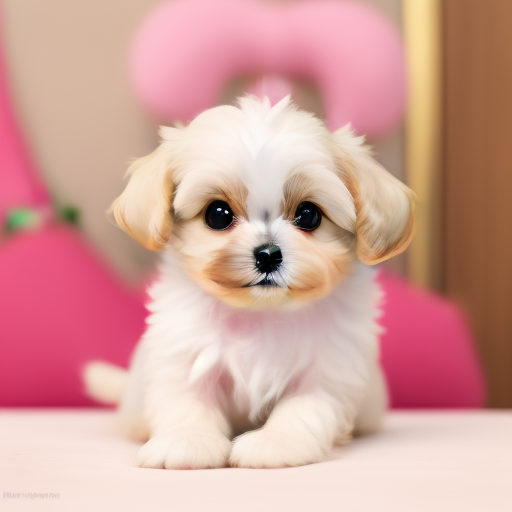

In [30]:
# stable diffusion
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")

image_data=ggg(category="tti",
    type="gai",
    prompt="maltese puppy",
    steps=5
    )
from PIL import Image
from io import BytesIO
from IPython.display import display
image = Image.open(BytesIO(image_data))
display(image)

### Example: OpenAI DALL-E 3

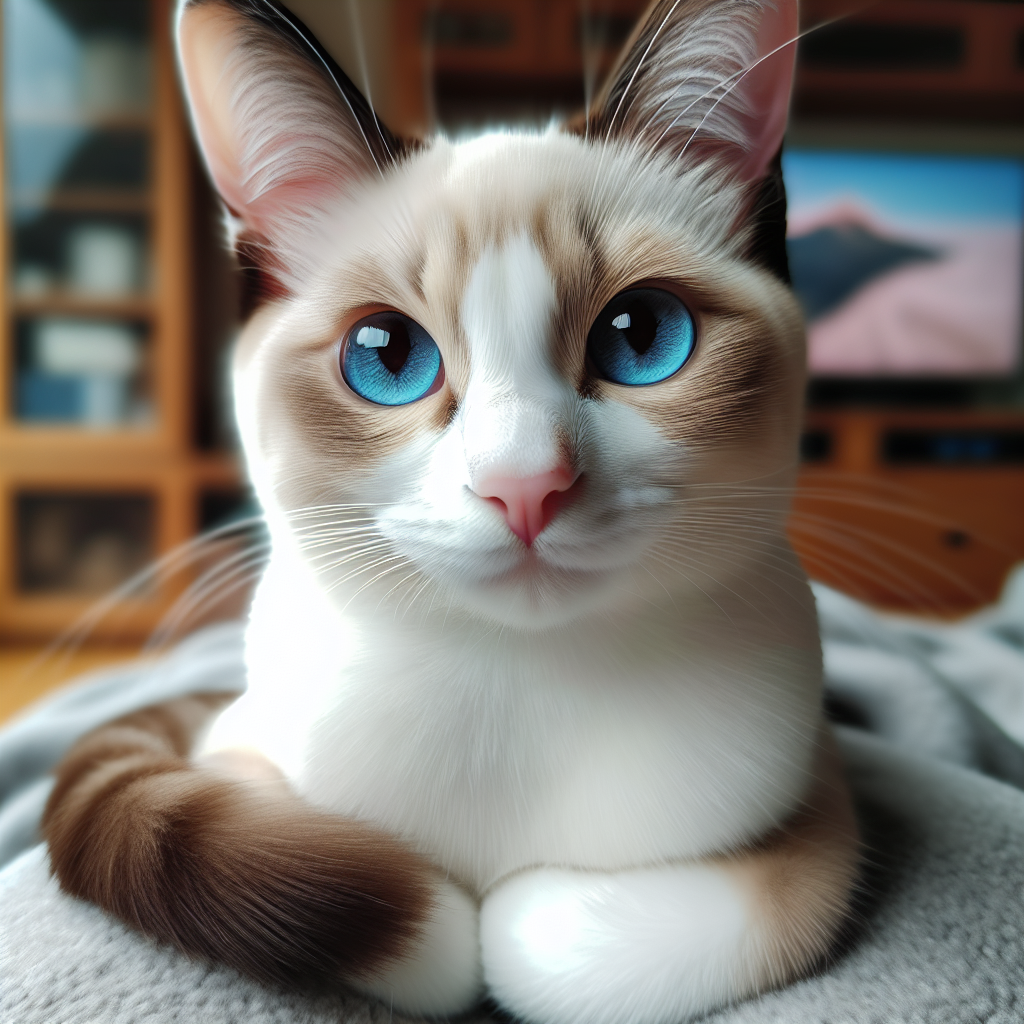

In [31]:
# openai
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")

image_data=ggg(category="tti",
    type="openai",
    prompt="4k photo of cute siamese cat"
    )
from PIL import Image
from io import BytesIO
from IPython.display import display
image = Image.open(BytesIO(image_data))
display(image)

---
## Retrieval Augmented Generation (RAG)

### Setup

Build the docker image using the following command in terminal.

```bash
docker buildx build \
    --build-arg CATEGORY=rag \
    -f ../../gai-sdk/gai-gen/Dockerfile \
    -t gai-rag:latest ../../gai-sdk/gai-gen/
```

Download model

```bash
mkdir ~/gai/models
huggingface-cli download hkunlp/instructor-large \
        --local-dir ~/gai/models/instructor-large \
        --local-dir-use-symlinks False
```

Start service

In [32]:
%%bash
docker container rm -f gai-ttt gai-tts gai-stt gai-itt gai-tti gai-rag
docker run -d \
    -e DEFAULT_GENERATOR=instructor-rag \
    --gpus all \
    -v ~/gai/models:/app/models \
    -p 12036:12036 \
    --name gai-rag \
    gai-rag:latest

Error response from daemon: No such container: gai-ttt
Error response from daemon: No such container: gai-tts
Error response from daemon: No such container: gai-stt
Error response from daemon: No such container: gai-itt
Error response from daemon: No such container: gai-tti
Error response from daemon: No such container: gai-rag


5f3e2223b59f17342fbc982c4d4dd761dc0ce62e650e1287b6f1ce2e4443c410


In [1]:
%%bash
docker run -d \
    -e DEFAULT_GENERATOR=mistral7b-exllama2 \
    --gpus all \
    -v ~/gai/models:/app/models \
    -p 12031:12031 \
    --name gai-ttt \
    gai-ttt:latest

9f9427898dc196a09cbb7841b494a98d8cf7055479de8fb4ac072419ab475d11


Step 1: Index the file 'pm_long_speech_2023.txt' into the vector database. This will break down the file into chunks of 1000 char and convert to text embeddings, then store them in the database.

In [2]:
# Index 2023 national day speech 
import asyncio
from gai.lib.RAGClientAsync import RAGClientAsync

async def listener(status):
    print(status)
rag=RAGClientAsync("./gai.local.yml")
response = await rag.index_document_async(
        collection_name="demo",
        file_path="./data/pm_long_speech_2023.txt",
        title="2023 National Day Rally Speech",
        source="https://www.pmo.gov.sg/Newsroom/national-day-rally-2023",
        async_callback=listener,
    )


DEBUG    httppost:url=http://localhost:12036/gen/v1/rag/index-file
DEBUG    httppost:data=None
INFO     Connected to ws://localhost:12036/gen/v1/rag/index-file/ws/demo


{"message": "Request received."}
{"message": "Breaking down document into chunks ..."}
{"message": "Start indexing..."}
{"progress": 1}
{"progress": 3}
{"progress": 4}
{"progress": 6}
{"progress": 7}
{"progress": 9}
{"progress": 10}
{"progress": 12}
{"progress": 13}
{"progress": 15}
{"progress": 16}
{"progress": 18}
{"progress": 19}
{"progress": 21}
{"progress": 22}
{"progress": 24}
{"progress": 25}
{"progress": 27}
{"progress": 28}
{"progress": 30}
{"progress": 31}
{"progress": 33}
{"progress": 34}
{"progress": 36}
{"progress": 37}
{"progress": 39}
{"progress": 40}
{"progress": 42}
{"progress": 43}
{"progress": 45}
{"progress": 46}
{"progress": 48}
{"progress": 50}
{"progress": 51}
{"progress": 53}
{"progress": 54}
{"progress": 56}
{"progress": 57}
{"progress": 59}
{"progress": 60}
{"progress": 62}
{"progress": 63}
{"progress": 65}
{"progress": 66}
{"progress": 68}
{"progress": 69}
{"progress": 71}
{"progress": 72}
{"progress": 74}
{"progress": 75}
{"progress": 77}
{"progress": 78}
{"

In [3]:
# Confirm File Uploaded

from gai.lib.RAGClientAsync import RAGClientAsync
rag = RAGClientAsync("./gai.local.yml")
docs = await rag.list_documents_async()
print(docs)


{'documents': [{'Id': 'PwR6VmXqAfwjn84ZM6dePsLWTldPv8cNS5dESYlsY2U', 'CollectionName': 'demo', 'ByteSize': 43352, 'FileName': 'pm_long_speech_2023.txt', 'FileType': 'txt', 'Source': 'https://www.pmo.gov.sg/Newsroom/national-day-rally-2023', 'Abstract': None, 'Authors': '', 'Title': '2023 National Day Rally Speech', 'Publisher': '', 'PublishedDate': None, 'Comments': '', 'Keywords': '', 'CreatedAt': '2024-06-09T14:05:26.303668', 'UpdatedAt': '2024-06-09T14:05:26.303674', 'IsActive': True, 'ChunkGroups': [{'Id': '3f5ca969-7e1a-4ef3-a992-1575034ab3ef', 'DocumentId': 'PwR6VmXqAfwjn84ZM6dePsLWTldPv8cNS5dESYlsY2U', 'SplitAlgo': 'recursive_split', 'ChunkCount': 66, 'ChunkSize': 1000, 'Overlap': 100, 'IsActive': True, 'ChunksDir': '/tmp/chunks/pm_long_speech_2023'}]}]}


### Step 3: Query and Retrieve

This method uses 2 models: embedding and text generation.

There are 4 scenarios that you can run this:
* GPU only: Run both embedding and text generation on GPU. This is the fastest configuration but only if you have enough GPU resources.
* GPU + CPU: Run the embedding on GPU and text generation on CPU. This configuration can take up to 2 minutes to complete the retrieval.
* GPU + openai: Run the embedding on GPU and openai-gpt4 for text generation. This assumes you have an openai API key.
* CPU only: Run both embedding and text generation on CPU. This is the slowest configuration and least preferrable.

The following setup is designed for running entirely on GPU, ie. "gai". If you have trouble running on GPU, you can try switching "gai" to "openai" in the command below for text generation.

In [4]:
from gai.lib.RAGClientAsync import RAGClientAsync
rag = RAGClientAsync("./gai.local.yml")
data = {
    "collection_name": "demo",
    "query_texts": "Who are the young seniors?",
}
response = await rag.retrieve_async(**data)
context = response
question = "Who are the young seniors?"

from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")
answer = ggg("ttt", 
             type="gai", 
             messages=f"user: Based on the context below: <context>{context}</context>, answer the question: {question}\nassistant:"
             )
for chunk in answer:
    print(chunk.decode(), end="", flush=True)

DEBUG    httppost:url=http://localhost:12036/gen/v1/rag/retrieve
DEBUG    httppost:data={'collection_name': 'demo', 'query_texts': 'Who are the young seniors?'}


DEBUG    TTTClient.api: messages=user: Based on the context below: <context>[{'documents': 'Especially for those in their 50s and early 60s. Let us call them the “Young Seniors”. "Young”, because you are younger than the Pioneer Generation and the Merdeka Generation; “Seniors”, because you will soon retire, or maybe you have recently retired.', 'metadatas': {'Abstract': '', 'ChunkGroupId': '3f5ca969-7e1a-4ef3-a992-1575034ab3ef', 'DocumentId': 'PwR6VmXqAfwjn84ZM6dePsLWTldPv8cNS5dESYlsY2U', 'Keywords': '', 'PublishedDate': '', 'Source': 'https://www.pmo.gov.sg/Newsroom/national-day-rally-2023', 'Title': '2023 National Day Rally Speech'}, 'distances': 0.09020859003067017, 'ids': 'd0bf2c36-dc7c-4988-98a4-276c0ee12a43'}, {'documents': 'Young Seniors are in a unique position today. Compared to the Pioneer and Merdeka Generations, you have benefited more from Singapore’s growth, and generally done better in life. But compared to workers younger than you, in their 30s and 40s today, you have g

The "Young Seniors" are individuals who are younger than the Pioneer Generation and the Merdeka Generation, and are currently in their 50s and early 60s. They are typically approaching retirement age or have recently retired.({'finish_reason': 'stop'}, 'finish_reason')

### Step 4: Query and Retrieve with Function Call

The AI will decide based on the context of the conversation, if the response require retrieval to answer the user's query.
The following example demonstrates the flow involving function call. 


In [5]:
# Setup
from gai.lib.GGG import GGG
ggg=GGG(("./gai.local.yml"))
tools = [
    {
        "type": "function",
        "function": {
            "name": "rag",
            "description": "The \'rag\' function is a specialized tool that allows the AI to perform semantic searches on PM Lee Hsien Loong\'s 2023 National Day Rally. It can be invoked when the AI needs to retrieve facts or information from the speech. This function utilizes advanced Natural Language Processing (NLP) techniques to understand and match the semantic meaning of the user\'s query with the content of the speech. This is particularly useful when the user\'s query relates to specific themes, topics, or statements made during the rally.",
            "parameters": {
                "type": "object",
                "properties": {
                    "search_query": {
                        "type": "array",
                        "items": {
                            "type":"string"
                        },
                        "description": "An array of query strings to perform a semantic search in the vector database. Each string in the array represents a different way of asking the question. This expands the coverage of the search and increases the chance of finding the best match. For example, instead of using one query like \'economic policies\', use multiple variations like [\'PM Lee Hsien Loong's economic policies announced at the 2023 National Day Rally\', \'What were the economic strategies discussed by PM Lee in 2023 National Day Rally?\', \'Economic measures announced by PM Lee in 2023 Rally\']."
                    }
                },
                "required": ["search_query"]
            }
        }
    }
]

# Objective
question = "What did PM Lee said about young seniors?"

# Function Call
messages = [{'role':'user','content':question},{'role':'assistant','content':''}]
response = ggg(category="ttt",
    type="openai",
    messages=messages, 
    tools=tools,
    stream=False)
result=response.decode()
query_texts=result["arguments"]
query_texts

'{\n  "search_query": ["PM Lee\'s statements about young seniors at the 2023 National Day Rally", "What did PM Lee say about young seniors in his 2023 National Day Rally speech?", "Initiatives for young seniors announced by PM Lee in 2023 Rally"]\n}'

In [6]:
# Retrieval
from gai.lib.RAGClientAsync import RAGClientAsync
rag = RAGClientAsync("./gai.local.yml")
data = {
    "collection_name": "demo",
    "query_texts": query_texts,
}
response = await rag.retrieve_async(**data)
response

DEBUG    httppost:url=http://localhost:12036/gen/v1/rag/retrieve
DEBUG    httppost:data={'collection_name': 'demo',
 'query_texts': '{\n'
                '  "search_query": ["PM Lee\'s statements about young seniors '
                'at the 2023 National Day Rally", "What did PM Lee say about '
                'young seniors in his 2023 National Day Rally speech?", '
                '"Initiatives for young seniors announced by PM Lee in 2023 '
                'Rally"]\n'
                '}'}


[{'documents': 'Singapore is one of the fastest-ageing nations in the world. Today, about one in five Singaporeans is a senior, aged 65 and above. By 2030, nearly one in four Singaporeans will be a senior. I first talked about ageing in the National Day Rally back in 2007. At that time, we had 500 centenarians – people aged 100 and older. We thought that was a lot. By 2013, which is 6 years later, this had doubled to around 1,000. And by 2030, we are likely to double again to at least 2,000 centenarians! It shows vividly how our society is getting older and older, faster and faster. Today, if you ask – it is not in the chart – but we have about 1,500 already. In 2030, I will not be making this speech, but whoever is doing so will have to take care of all of us seniors, and some of us very senior.\n\nToday, we are an aged society; soon, we will be a ‘super-aged’ society. This has massive social and economic implications. We have much to do to help our seniors age well.',
  'metadatas': 

In [7]:
# Response
context = response

from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")
answer = ggg("ttt", type="openai", messages=f"user: Based on the context below: <context>{context}</context>, answer the question: {question}\nassistant:")
for chunk in answer:
    print(chunk.decode(), end="", flush=True)

PM Lee referred to people in their 50s and early 60s as "Young Seniors". He explained that they are considered "Young" because they are younger than the Pioneer Generation and the Merdeka Generation, but are called "Seniors" because they will soon retire or may have recently retired.None